In [1]:
%matplotlib notebook
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_recall_fscore_support
from sklearn.linear_model import LinearRegression
import matplotlib.pylab as plt
import pandas as pd
import numpy as np
from pandas.tools.plotting import scatter_matrix

In [4]:
import json
from pprint import pprint

df = []

with open('/Users/kershad1/Downloads/twitter-logit-geo') as data_file:
    for l in data_file:
        df.append(json.loads(l))
df = pd.DataFrame(df).drop('conf', 1)

In [17]:
df.head()

,combination,observation_level,result,target
0,all,196,0.571429,popularity_class
1,time,196,0.428571,popularity_class
2,community,196,0.571429,popularity_class
3,basic,196,0.714286,popularity_class
4,cascades,196,0.714286,popularity_class


array([<matplotlib.axes._subplots.AxesSubplot object at 0x10ae0ad50>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x10e936b10>], dtype=object)

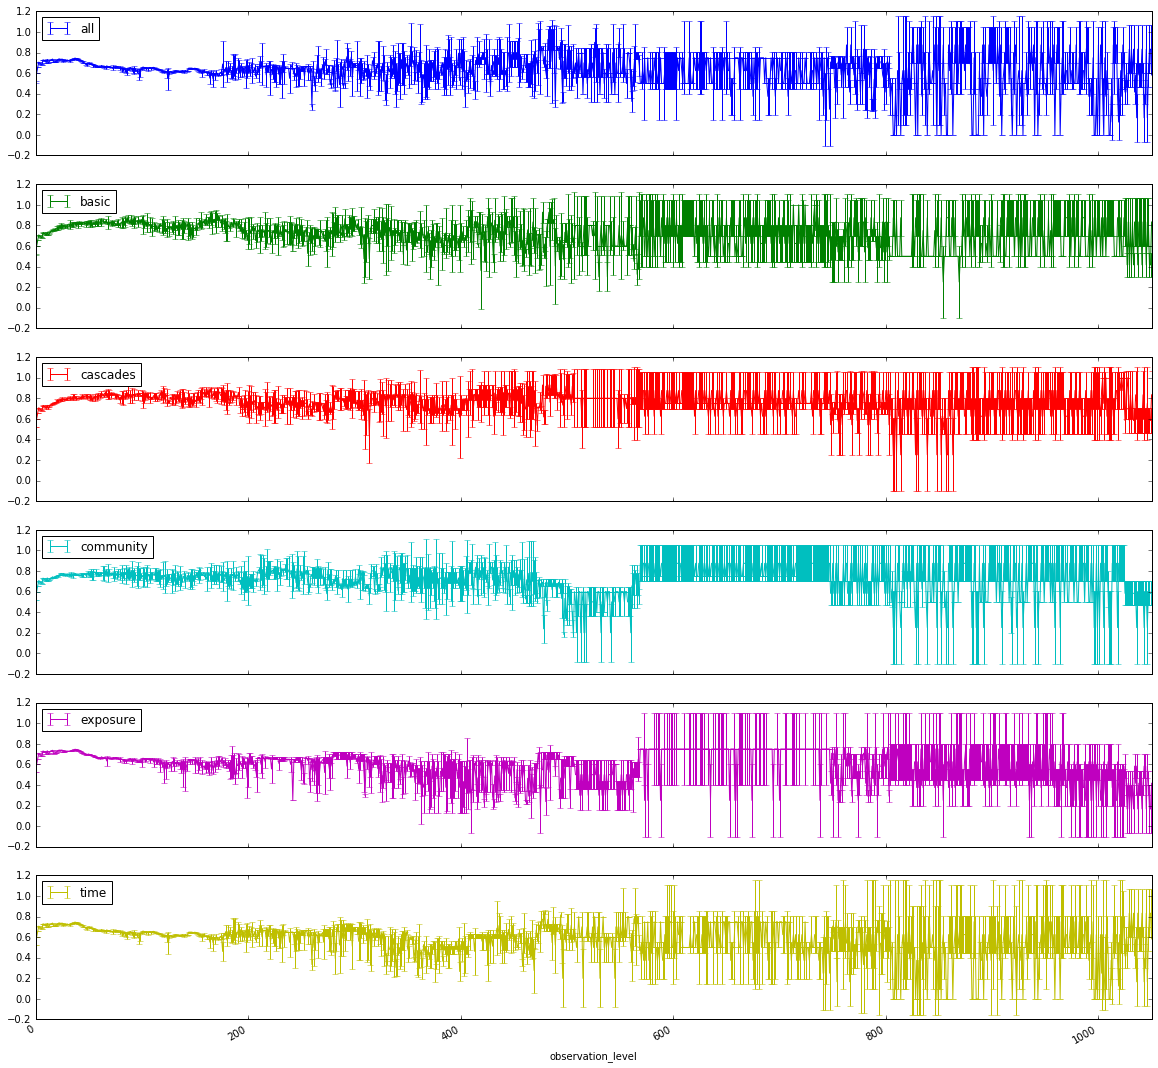

In [19]:
%matplotlib inline
men = pd.pivot_table(df[(df["target"] == "user_popularity_class")], columns=["combination"], values="result", index=["observation_level"], aggfunc=np.mean)
std = pd.pivot_table(df[(df["target"] == "user_popularity_class")], columns=["combination"], values="result", index=["observation_level"], aggfunc=np.std)
men.plot(subplots=True, figsize=(20,20),yerr=std)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1184b07d0>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x118b48490>], dtype=object)

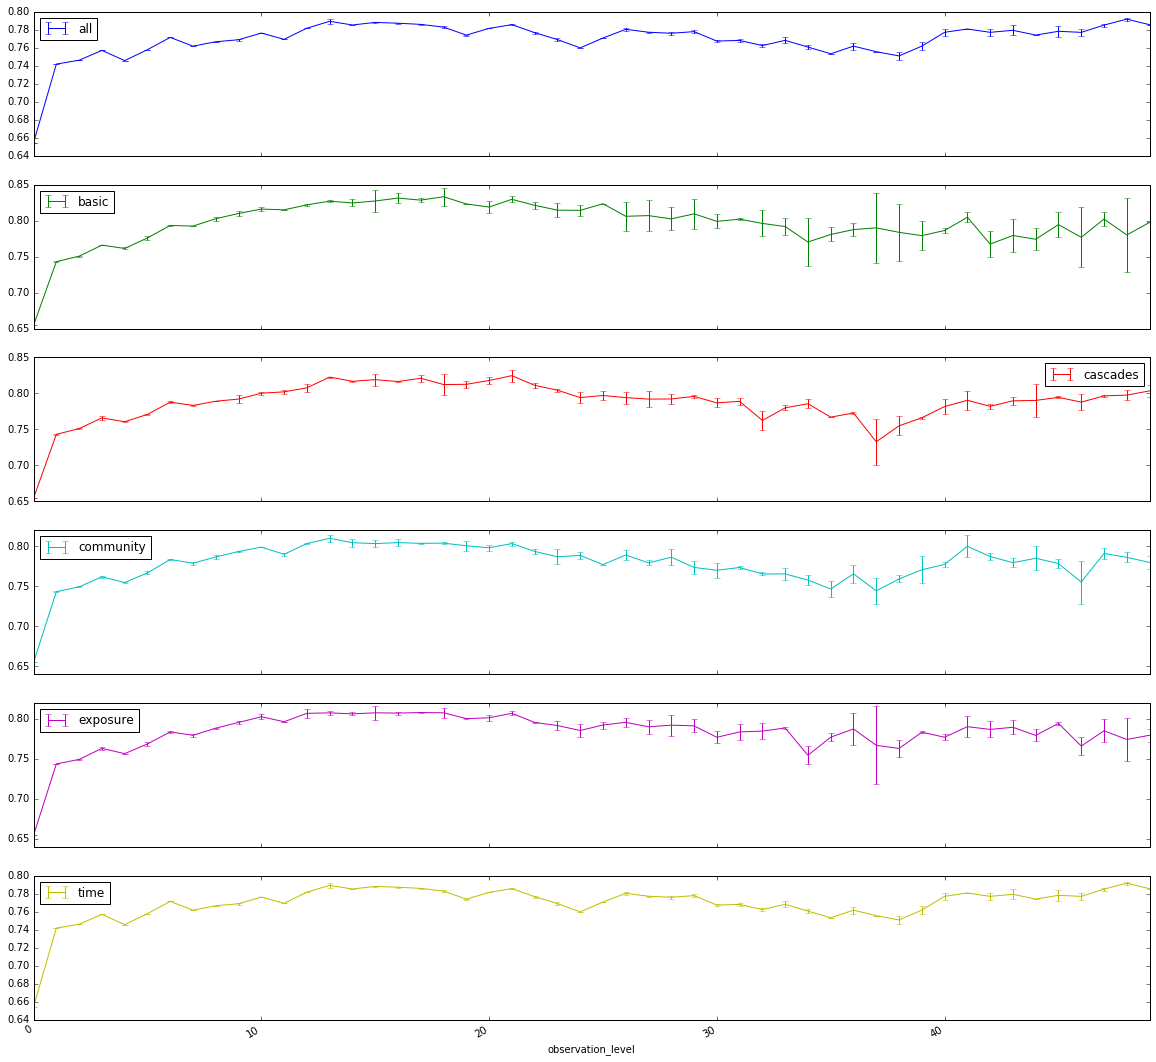

In [39]:
%matplotlib inline
men = pd.pivot_table(df[(df["target"] == "popularity_class")], columns=["combination"], values="result", index=["observation_level"], aggfunc=np.mean)
std = pd.pivot_table(df[(df["target"] == "popularity_class")], columns=["combination"], values="result", index=["observation_level"], aggfunc=np.std)
men[:50].plot(subplots=True, figsize=(20,20),yerr=std[:50])

In [21]:
combinations = {
    "time":["time_step_mean","time_step_cv"],
    "basic":["surface","number_activated_users","number_activations"],
    "community":["inffected_communities_normalised","activation_entorpy","activation_entorpy","usage_dominace","user_usage_dominance"],
    "exposure":["user_exposure_mean", "activateion_exposure_mean"],
    "cascades":["wiener_index_avrage","number_of_trees"],
    "all":["time_step_mean","time_step_cv","surface","number_activated_users","number_activations","inffected_communities_normalised","activation_entorpy","activation_entorpy","usage_dominace","user_usage_dominance","user_exposure_mean", "activateion_exposure_mean","wiener_index_avrage","number_of_trees"]
}

In [32]:
import json
from pprint import pprint

cofdf = []

with open('/Users/kershad1/Downloads/twitter-logit-geo') as data_file:
    for l in data_file:
        v = json.loads(l)
        for x, y in zip(v["conf"][0], combinations[v["combination"]]):
            z = v.copy()
            del z["result"]
            del z["conf"]
            z["messure"] = y
            z["value"] = x
            cofdf.append(z)
cofdf = pd.DataFrame(cofdf)

In [33]:
cofdf.head()

,combination,messure,observation_level,target,value
0,all,time_step_mean,196,popularity_class,-3.789833e-07
1,all,time_step_cv,196,popularity_class,7.629221e-08
2,all,surface,196,popularity_class,7.986281e-05
3,all,number_activated_users,196,popularity_class,5.856044e-06
4,all,number_activations,196,popularity_class,7.508608e-06


In [34]:
%matplotlib inline

t = cofdf[(cofdf["combination"] == "all") & (cofdf["target"] == "user_popularity_class")]
men = pd.pivot_table(t, columns=["messure"],index=["observation_level"], values=["value"], aggfunc=np.mean)
std = pd.pivot_table(t, columns=["messure"],index=["observation_level"], values=["value"], aggfunc=np.std)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1177946d0>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x117eed350>], dtype=object)

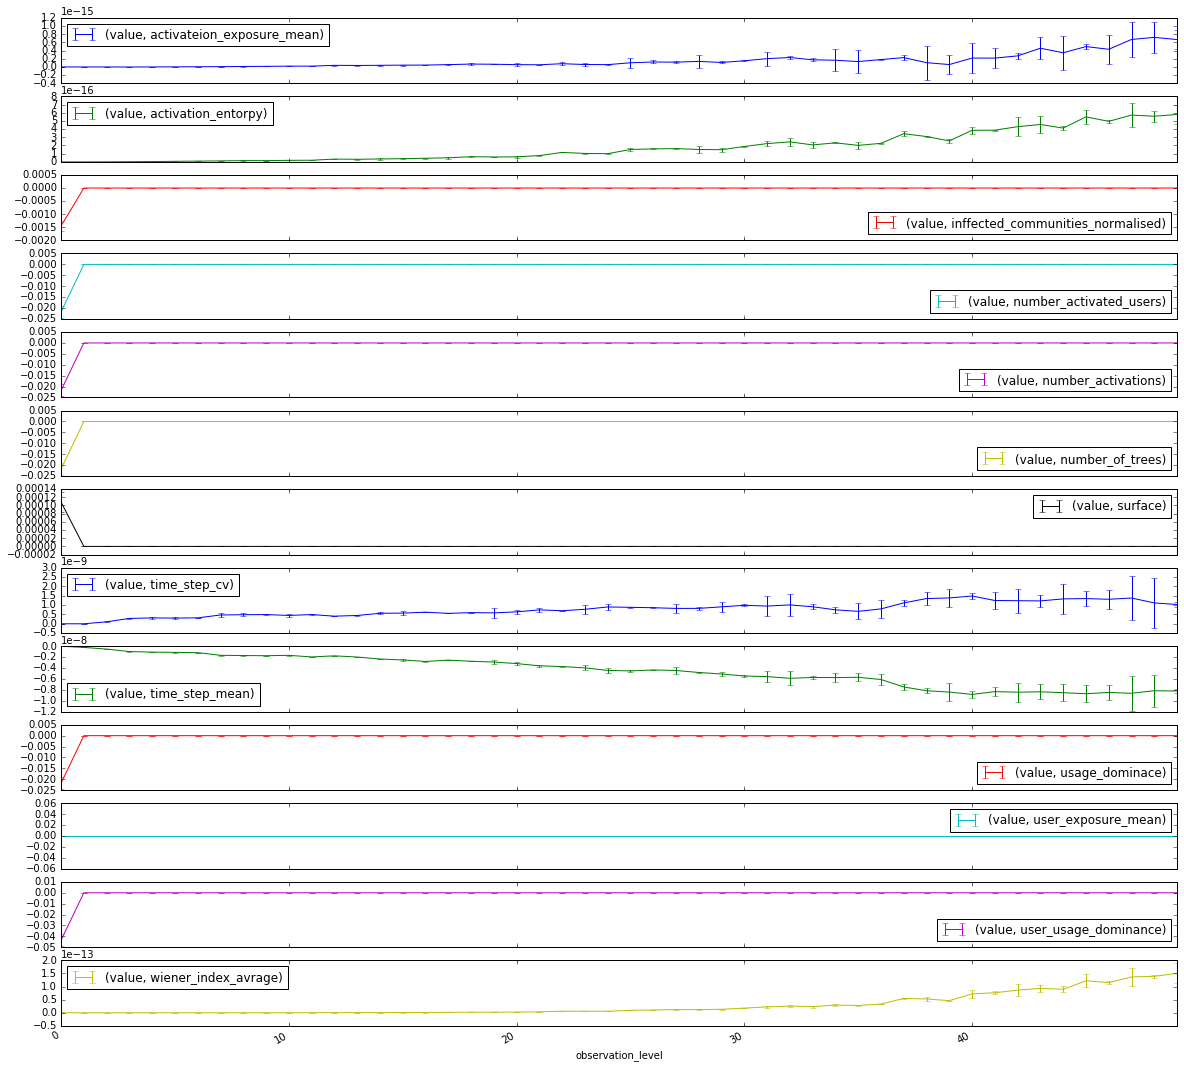

In [38]:
men[:50].plot(subplots=True, figsize=(20,20),yerr=std[:50])